In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
from citipy import citipy
from config import weather_api_key
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kenai
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | kushima
Processing Record 4 of Set 1 | zhangzhou
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | choucheng
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | halalo
City not found. Skipping...
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | miri
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | azuaga
Processing Record 17 of Set 1 | ituni
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | new norfolk
Processing Record 2

Processing Record 40 of Set 4 | tolaga bay
Processing Record 41 of Set 4 | sena madureira
Processing Record 42 of Set 4 | montrose
Processing Record 43 of Set 4 | kungurtug
Processing Record 44 of Set 4 | chagda
City not found. Skipping...
Processing Record 45 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 46 of Set 4 | forest hills
Processing Record 47 of Set 4 | labuan
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | vaitape
Processing Record 50 of Set 4 | klaksvik
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | panaba
Processing Record 3 of Set 5 | hualmay
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | gatesville
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | port macquarie
Processing Record 8 of Set 5 | baykit
Processing Record 9 of Set 5 | luderitz
Processing Record 10 of Set 5 | lompoc
Processing Record 11 of Set 5 | broome
Processing Record 12 of Set 5 | raudebe

Processing Record 29 of Set 8 | cotonou
Processing Record 30 of Set 8 | marcona
City not found. Skipping...
Processing Record 31 of Set 8 | alyangula
Processing Record 32 of Set 8 | inhambane
Processing Record 33 of Set 8 | boa esperanca
Processing Record 34 of Set 8 | egvekinot
Processing Record 35 of Set 8 | velyka pysarivka
Processing Record 36 of Set 8 | mersing
Processing Record 37 of Set 8 | tete
Processing Record 38 of Set 8 | ustye
Processing Record 39 of Set 8 | kolomak
Processing Record 40 of Set 8 | chicama
Processing Record 41 of Set 8 | sitka
Processing Record 42 of Set 8 | auki
Processing Record 43 of Set 8 | aitape
Processing Record 44 of Set 8 | adrar
Processing Record 45 of Set 8 | port lincoln
Processing Record 46 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 47 of Set 8 | canto do buriti
Processing Record 48 of Set 8 | havre-saint-pierre
Processing Record 49 of Set 8 | korla
Processing Record 50 of Set 8 | acarau
Processing Record 1 of Set 9

Processing Record 15 of Set 12 | saint-pierre
Processing Record 16 of Set 12 | abalak
Processing Record 17 of Set 12 | bubaque
Processing Record 18 of Set 12 | pullman
Processing Record 19 of Set 12 | tevaitoa
Processing Record 20 of Set 12 | kintampo
Processing Record 21 of Set 12 | badvel
Processing Record 22 of Set 12 | iqaluit
Processing Record 23 of Set 12 | porbandar
Processing Record 24 of Set 12 | srivardhan
Processing Record 25 of Set 12 | almeirim
Processing Record 26 of Set 12 | lukulu
Processing Record 27 of Set 12 | fort nelson
Processing Record 28 of Set 12 | yerbogachen
Processing Record 29 of Set 12 | malino
Processing Record 30 of Set 12 | tombouctou
Processing Record 31 of Set 12 | poronaysk
Processing Record 32 of Set 12 | rumphi
Processing Record 33 of Set 12 | port moresby
Processing Record 34 of Set 12 | baturaja
Processing Record 35 of Set 12 | tubuala
Processing Record 36 of Set 12 | kegayli
City not found. Skipping...
Processing Record 37 of Set 12 | bogorodsko

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kenai,60.5544,-151.2583,39.15,54,100,18.41,US,2022-10-12 23:17:11
1,Bathsheba,13.2167,-59.5167,83.01,78,40,12.66,BB,2022-10-12 23:17:11
2,Kushima,31.4583,131.2333,70.32,74,79,14.72,JP,2022-10-12 23:17:12
3,Zhangzhou,24.5133,117.6556,73.33,72,14,2.26,CN,2022-10-12 23:17:12
4,Ketchikan,55.3422,-131.6461,55.87,76,100,6.91,US,2022-10-12 23:17:12
5,Codrington,-38.2667,141.9667,52.02,96,100,7.09,AU,2022-10-12 23:17:13
6,Busselton,-33.6500,115.3333,49.71,72,22,2.80,AU,2022-10-12 23:17:13
7,Qaanaaq,77.4840,-69.3632,6.93,63,9,8.05,GL,2022-10-12 23:17:14
8,Victoria,22.2855,114.1577,78.24,55,15,18.99,HK,2022-10-12 23:17:14
9,Vaini,-21.2000,-175.2000,77.16,78,40,9.22,TO,2022-10-12 23:17:14


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

OSError: Cannot save file into a non-existent directory: 'weather_data'

In [4]:
#Read CSV data 
city_data_df = pd.read_csv('weather_data/cities.csv')
city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Kenai,60.5544,-151.2583,39.15,54,100,18.41,US,2022-10-12 23:17:11
1,1,Bathsheba,13.2167,-59.5167,83.01,78,40,12.66,BB,2022-10-12 23:17:11
2,2,Kushima,31.4583,131.2333,70.32,74,79,14.72,JP,2022-10-12 23:17:12
3,3,Zhangzhou,24.5133,117.6556,73.33,72,14,2.26,CN,2022-10-12 23:17:12
4,4,Ketchikan,55.3422,-131.6461,55.87,76,100,6.91,US,2022-10-12 23:17:12
...,...,...,...,...,...,...,...,...,...,...
566,566,Mount Gambier,-37.8333,140.7667,52.93,84,100,6.60,AU,2022-10-12 23:16:15
567,567,Tessaoua,13.7574,7.9874,86.70,25,5,6.91,NE,2022-10-12 23:20:34
568,568,Nowy Dwor Gdanski,54.2131,19.1177,47.68,68,98,6.53,PL,2022-10-12 23:20:35
569,569,Floresta,-8.6011,-38.5686,79.45,49,25,22.70,BR,2022-10-12 23:20:35


In [5]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
Date = city_data_df.loc[1,"Date"][0:10]

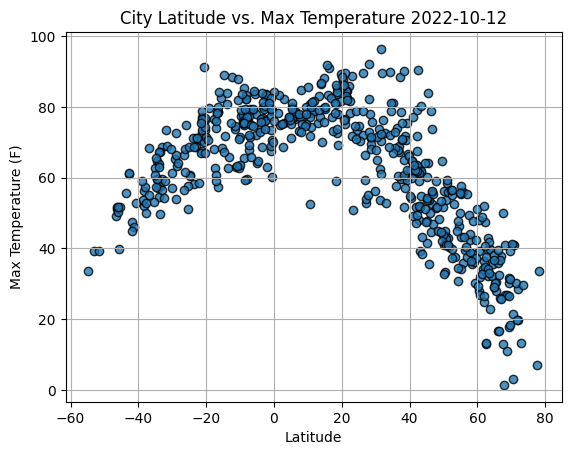

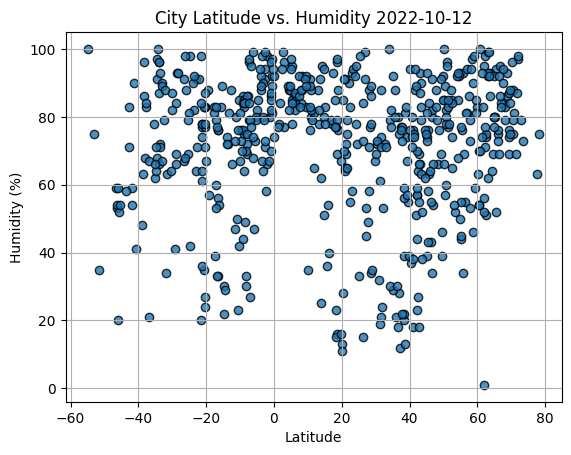

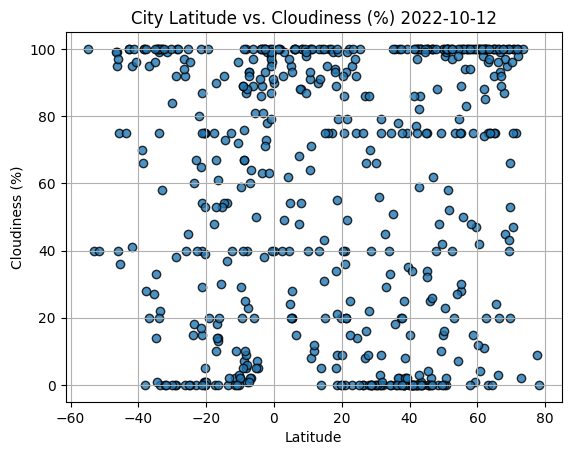

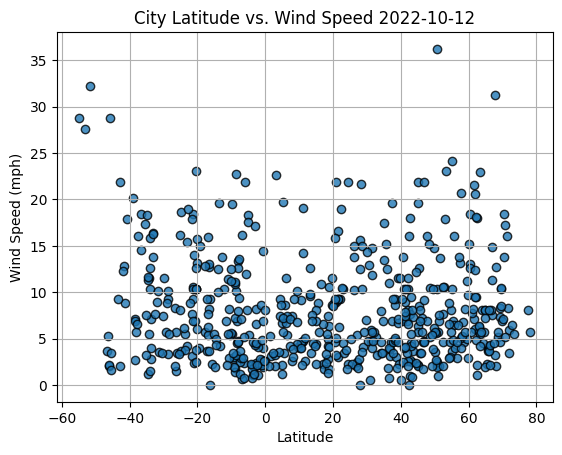

In [6]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ Date)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ Date)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ Date)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ Date)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

